<h1>Introduction

The Titanic disaster is a very popular one. If you are anything like most people you would have heard about this giant ship that was thought to be unsinkable but was brought down by an iceberg.
 This ML model that will be built here will predict the survivors of this disastrous event and it is a model that will satisfy a competition here on kaggle. 
  I hope this turns out good. This is my first competition here on kaggle. This is actually my first ML project, i hope you enjoy it.

![Titanic](Screenshot_20220908-220333~2.png)<p/>

The Titanic propellers. In this 1911 photo, the R. M. S Titanic was showcased at the Harland and Wolff shipyards in Belfast before its tragic maiden voyage in the 1912

So in this competition there are two datasets. **'Train dataset'** which would be used to train the model and the **'Test dataset'** which would be used to test the data

       First lets import some neccessary librarries and load the datasets

In [104]:
import pandas as pd #For loading dataframes
import numpy as np #For numpy arrays
import seaborn as sns #For plotting charts 
import matplotlib.pyplot as plt #For plotting charts

In [105]:
#Loading the datasets
train_data= pd.read_csv(r'C:\python\ML\Kaggle\train.csv')
test_data= pd.read_csv(r'C:\python\ML\Kaggle\test.csv')


In [106]:
#To get an overview of these datasets
display('Train Dataset', train_data.info())
display('Test Dataset', test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'Train Dataset'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


'Test Dataset'

None

- In the train dataset there are 891 rows and 12 columns
- The test dataset has 418 rows with 11 columns.
- The "Survived" column was not included in the test dataset as described in the data description.<p/>

This is a similar dataset with almost the same columns so i will merge the two dataset for easy preprocessing and anomaly detection, after dropping the **'Survived'** column. This dataset will be splitted later when i get to training the model.

In [107]:
#Merging the two datasets
from heapq import merge


train_data_clone= train_data #Cloning this dataset because i will need to use it again with the "Survived" column

y_train= train_data_clone.Survived
train_data_clone.drop(['Survived'], axis=1, inplace= True) #Dropping this coloumn

merged_t= pd.concat([train_data_clone, test_data], axis= 0, ignore_index= True) #Merging the datasets
print('The shape of the dataset is ', merged_t.shape) 
merged_t.tail()

The shape of the dataset is  (1309, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Now to see the overview of the merged dataset

In [108]:
merged_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


Looks like there are some missing values

In [109]:
merged_t.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


There are missing values in columns such as Age,Fare,Cabin and Embarked. I will have to deal with those missing values.
I could drop these columns but then large chunk of data would be lost which will definately affect our prediction. 

The best thing to do will be to replace this missing values. Fare and embarked hhas vsery low number of missing values so i will replace them with the most occuring values.To determine the values to replace the Age column with, let me do a plot.
Additionally we have very high number of null values in the Cabin column and replacing them with any of these values may affect the precision of this model so i will just fill it with NaN


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

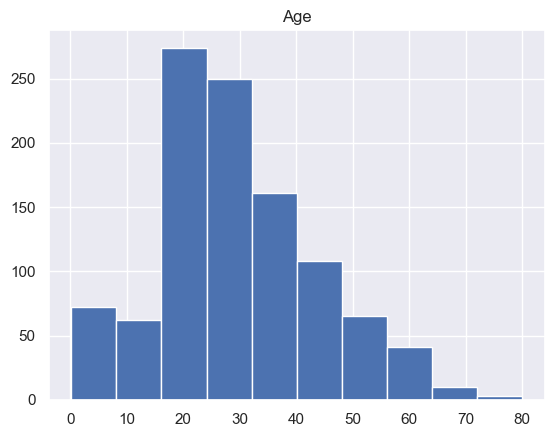

In [110]:
#checking the best value to replace the missing values in Age column
sns.set()
merged_t.hist('Age')

Looks like this incredible ship did not interest old people so much.<p/>
<p/>
The chart above shows that Age contain outliers so it wont be best practice to replace the values with mean so i will go for the median.

In [111]:
merged_t['Age'].fillna((merged_t['Age'].median()), inplace= True)#replacing missing age with the median
merged_t['Fare'].fillna((merged_t['Fare'].mode()[0]), inplace= True)#replacing missing fare with mode
merged_t['Embarked'].fillna((merged_t['Embarked'].mode()[0]), inplace= True)#replacing missing Embarked with mode
merged_t['Cabin'].fillna('NaN', inplace= True)#replacing missing cabins with NaN

In [112]:
#check for missing value once more
merged_t.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

There are no more null values in the dataset. So now to anomaly detection.
One way i could detect if there was something wrong with the data is by using the describe() method

In [113]:
merged_t.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.503186,0.498854,0.385027,33.276193
std,378.020061,0.837836,12.905241,1.041658,0.865560,51.743584
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


There seems to be an anomaly in the Age column
- Age should not be be in decimal 
- The minimal age should not be less than 1<p/>

<p><p/>

      Assumptions
- Maybe the decimal represents months, weeks etc. Someone that is a year and 6 months old maybe recorded as 1.60000
- Could it be that a baby less than 1 year old was aboard? Which would explain the 0.1


In [114]:
#To check how many cases of anomaly we have in the age column

abnormal_age= merged_t.query('Age % 1 !=0') 
print('There are', len(abnormal_age), 'abnormal ages')




There are 45 abnormal ages


Assuming my assumptions are correct, then i will round the ages to the nearest whole number. But values with less than 0.5 will be rounded to 0 so i will replace them with 1 instead. 
Therefore 
- All the babies less than 6 months will be calculated as 1 year old
- Babies more than 6 months old will calculated as 1 year
- Adult that are more than 6 months away from their birtday will not be added 1 year
- Adult that are more than 6 months closer to their birtday will be added 1 year

In [115]:
#Lets take care of this anomaly
integer=merged_t[['Age']].apply(np.int64) #Convert the column to integer
merge_t_clone=merged_t #cloning to avoid tampering with the data
merge_t_clone.insert(7, 'newage', integer) #inserting the new column into the dataframe
merge_t_clone.loc[merge_t_clone['newage'] < 1, 'newerage'] =+1 #adding 1 year to infants that were less than 6 months old
merge_t_clone.loc[merge_t_clone['newage'] >= 1, 'newerage'] = merge_t_clone['newage']
titanic_v=merge_t_clone.drop(['Age', 'newage'], axis=1) #drop the unneccessary columns
titanic_v.rename(columns= {'newerage':'Age'}, inplace=True) #renaming the newerage column



titanic_v.head(165)
    





,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...
160,161,3,"Cribb, Mr. John Hatfield",male,0,1,371362,16.1000,NaN,S,44.0
161,162,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,0,0,C.A. 33595,15.7500,NaN,S,40.0
162,163,3,"Bengtsson, Mr. John Viktor",male,0,0,347068,7.7750,NaN,S,26.0
163,164,3,"Calic, Mr. Jovo",male,0,0,315093,8.6625,NaN,S,17.0


In [116]:
#To check how many cases of anomaly we still have in the age column

abnormal_ages= titanic_v.query('Age % 1 !=0') 
print('There are', len(abnormal_ages), 'abnormal ages')




There are 0 abnormal ages


In [117]:
titanic_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Cabin        1309 non-null   object 
 9   Embarked     1309 non-null   object 
 10  Age          1309 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


<h1>Feature selection

Before we select features, remember i merged both the training and testing data so we could easily do the preprocessing and anomaly detection. Now i am going to split the data so i can train the model on just the training dataset

In [118]:
titanic_v.drop(['Name', 'PassengerId', 'Ticket'], axis=1,  inplace = True)#dropping the unnecessary columns

train_split= pd.concat([titanic_v.sort_index().iloc[:891], y_train],axis=1) 
#this will cut the first 891 rows and concat with the cloned dataset 'y_train' that contained the 'survived' column
train_split.tail()



,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age,Survived
886,2,male,0,0,13.00,NaN,S,27.0,0
887,1,female,0,0,30.00,B42,S,19.0,1
888,3,female,1,2,23.45,NaN,S,28.0,0
889,1,male,0,0,30.00,C148,C,26.0,1
890,3,male,0,0,7.75,NaN,Q,32.0,0


In [119]:
train_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  891 non-null    object 
 7   Age       891 non-null    float64
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [120]:
cor= train_split.corr()
cor

,Pclass,SibSp,Parch,Fare,Age,Survived
Pclass,1.000000,0.083081,0.018443,-0.549500,-0.340471,-0.338481
SibSp,0.083081,1.000000,0.414838,0.159651,-0.233117,-0.035322
Parch,0.018443,0.414838,1.000000,0.216225,-0.172298,0.081629
Fare,-0.549500,0.159651,0.216225,1.000000,0.097029,0.257307
Age,-0.340471,-0.233117,-0.172298,0.097029,1.000000,-0.064230
Survived,-0.338481,-0.035322,0.081629,0.257307,-0.064230,1.000000


- Features like the name and the passenger id are just used to identify the passengers and does not describe the passengers in a way that will be useful for this model so i have dropped them. Futhermore, as shown above, passenger id has very low correlation with survival.Also Tickets column just gives the id of the ticket collected it does not have any significan effect moreover we already have the pclass that perfectly describes ticket type.
- It can be seen that other features has good relationship with survival based on this correllation coefficient table above

I have a lot of features and it is really hard to choose which would be the right one for my model.
Though the correlation table shows that the selected tables are adequately correlated to the target variable i will still do some visualization to show these relationship


<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

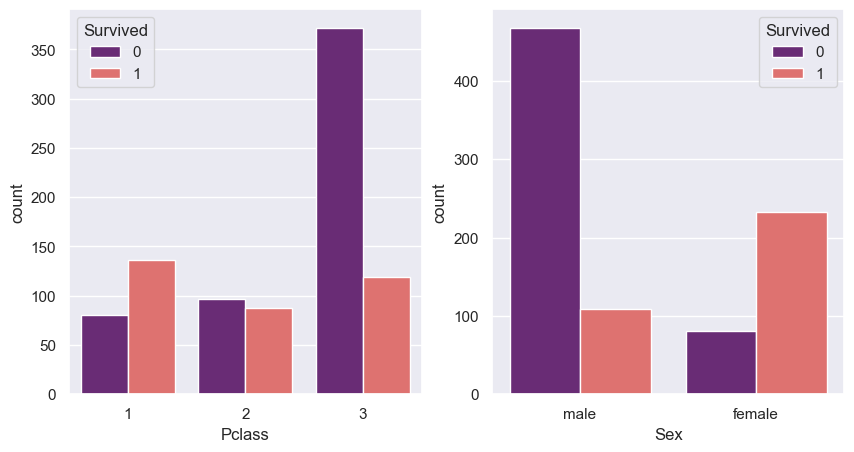

<Figure size 500x400 with 0 Axes>

In [121]:

feature_pclass= train_split.groupby(by='Pclass')['Survived'].value_counts()
plt.figure(figsize=(5,4))
pclass_surv= train_split.groupby(by='Sex')['Survived'].value_counts()
plt.figure(figsize=(5,4))

cols= ['Pclass', 'Sex']
fig, ax= plt.subplots(nrows=1, ncols=2, figsize= (10,5))
plt.figure(figsize=(5,4))

for col, subplot in zip(cols,ax.flatten()):
    sns.countplot(data=train_split, x= col, hue= 'Survived', ax= subplot, palette= 'magma')
    
plt.show()


- Survival increases as the class increase. There are more survivor in second class than the first floor and the same thing occured with the third and second class
- There are more male survivor than the female
- These has been selected as predictors as they has effect on the target variable

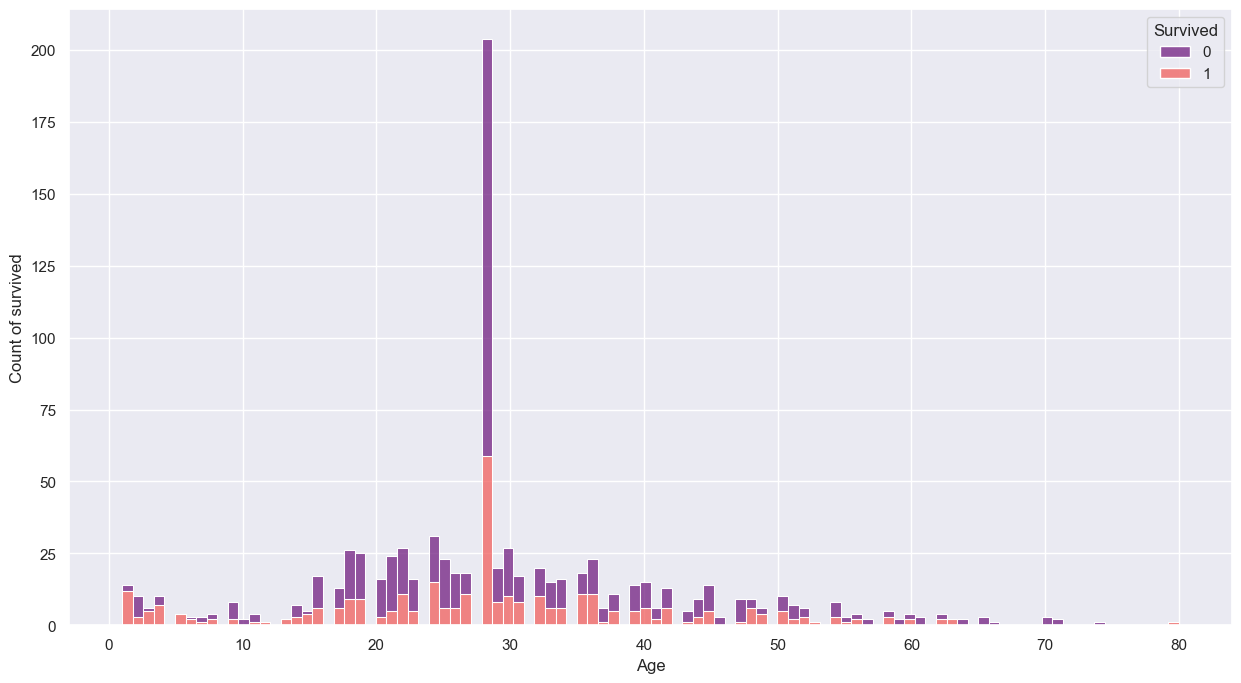

In [122]:
train_surv = pd.concat([titanic_v.sort_index().iloc[:891], y_train], axis = 1)
plt.figure(figsize = (15, 8))
sns.histplot(data = train_surv, x = 'Age', hue = 'Survived', multiple = 'stack', bins = 100, palette = 'magma')
plt.ylabel('Count of survived')
plt.show()



This shows that there was less chance of survivor for old people but let me group this age so the chart will make more sense

Text(0, 0.5, 'Count of survived')

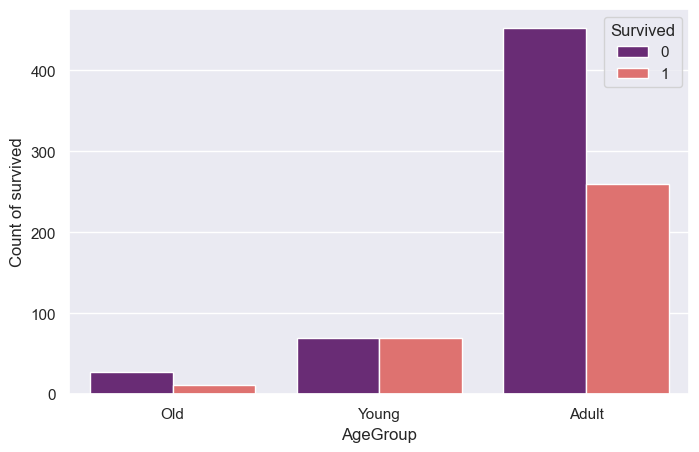

In [123]:
def age_bucket(AG): # Creating a user-defined function for creating Age buckets
    AgeGroup = [] # Array declartion
    if AG > 0 and AG <= 18 : 
        AgeGroup = "Young" 
    if AG > 18 and AG <= 55 : 
        AgeGroup = "Adult"       
    if AG > 55 :
        AgeGroup = "Old"

    return AgeGroup

Age_Group = [age_bucket(AG) for AG in titanic_v.Age] # Function call


titanic_v.insert(2, 'AgeGroup', Age_Group) # Adding new column in data-set


titanic= titanic_v.drop(['Age'], axis=1)

train_surv = pd.concat([titanic.sort_index().iloc[:891], y_train], axis = 1)
agSurvival = train_surv.groupby(by = 'AgeGroup')['Survived'].value_counts()

plt.figure(figsize=(8,5))
sns.countplot(data = train_surv, x = 'AgeGroup', hue = 'Survived', order = ['Old', 'Young', 'Adult'], palette = 'magma')
plt.ylabel('Count of survived')




- Adults and young people has higher chance of surviving than the old ones
- This has been selected as a predictor

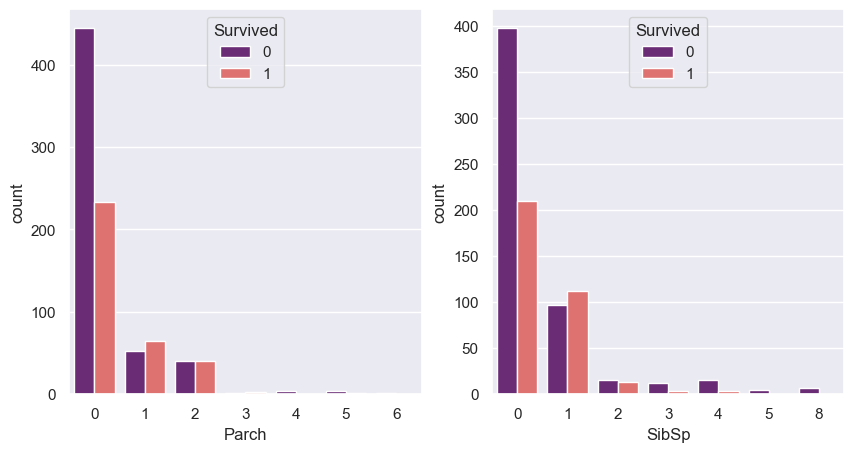

<Figure size 500x400 with 0 Axes>

In [124]:


train_surv = pd.concat([titanic.sort_index().iloc[:891], y_train], axis = 1) # Adding Survived Column in train dataset for Comaparison
cols= ['Parch', 'SibSp']
fig, ax= plt.subplots(nrows=1, ncols=2, figsize= (10,5))
plt.figure(figsize=(5,4))

for col, subplot in zip(cols,ax.flatten()):
    sns.countplot(data = train_surv, x= col, hue= 'Survived', ax= subplot, palette= 'magma')
    
plt.show()

- Survival rate decreases as the number of family members increases
- These predictors has been selected

([<matplotlib.axis.XTick at 0x1d6f20a5900>,
 [Text(0, 0, 'Southampton'),
  Text(1, 0, 'Cherbourg'),
  Text(2, 0, 'Queenstown')])

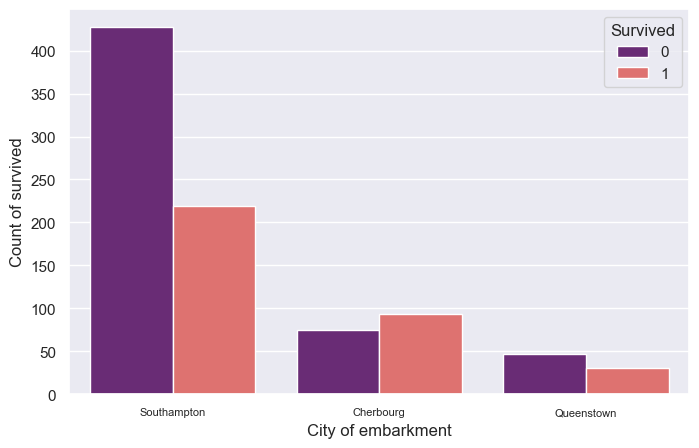

In [125]:
embarked_surv= train_split.groupby(by='Embarked')['Survived'].value_counts()
plt.figure(figsize=(8,5))

sns.countplot(data=train_split, x= 'Embarked', hue= 'Survived', palette= 'magma')
plt.ylabel('Count of survived')
plt.xlabel('City of embarkment')
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 8)

- There are more survivors from Southamptom than the rest. Seems the city of embarkment has effect on the survival rate.
- This predictor has selected


There are so much nan values in the cabin column that it can not be used to at this state so i will have to group them into 2
(Yes and No) 'Yes' for when there is a value and 'No' for when the value is NaN

Cabin
No       1014
Yes       295
dtype: int64

Text(0, 0.5, 'Count of survived')

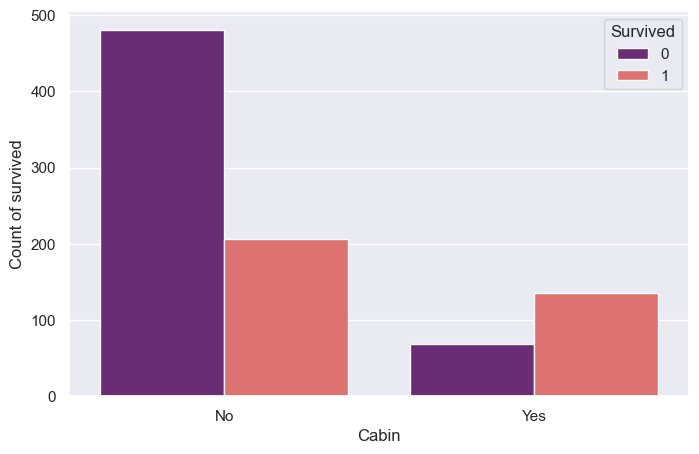

In [126]:


titanic['Cabin'] = ['Yes' if cabin != 'NaN' else 'No' for cabin in titanic.Cabin]


display(titanic[['Cabin']].value_counts())

train_surv = pd.concat([titanic.sort_index().iloc[:891], y_train], axis = 1)
cabSurvival = train_surv.groupby(by = 'Cabin')['Survived'].value_counts()

plt.figure(figsize=(8,5))
sns.countplot(data = train_surv, x = 'Cabin',  hue = 'Survived', palette = 'magma')
plt.ylabel('Count of survived')

- There are very high survival rate at the no cabin than the yes cabin 
- This feature has been choosen as there are significant relatiomnship between cabin and the survival rate

Like the age features, the fare feature has lots of distinct variables so i will have to group them to understand the chart better

Text(0, 0.5, 'Count of survived')

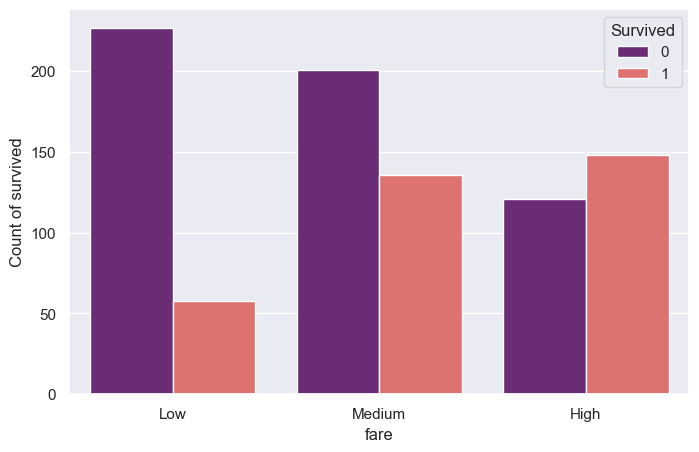

In [127]:
q1= titanic.Fare.quantile(0.30)
q2= titanic.Fare.quantile(0.70)


titanic.insert(4, 'fare', np.nan)
titanic.loc[(titanic.Fare<=q1), 'fare'] = 'Low'
titanic.loc[(titanic.Fare>q1) & (titanic.Fare<q2), 'fare'] = 'Medium'
titanic.loc[(titanic.Fare>=q2), 'fare'] = 'High'
titanic= titanic.drop(['Fare'], axis=1)

train_surv = pd.concat([titanic.sort_index().iloc[:891], y_train], axis = 1)
fgSurvival = train_surv.groupby(by='fare')['Survived'].value_counts()

plt.figure(figsize=(8,5))

sns.countplot(data=train_surv, x= 'fare', hue= 'Survived', palette= 'magma', order= ['Low', 'Medium', 'High'])
plt.ylabel('Count of survived')





- Survival increases as the fare quartile decreases
- This feature has been selected

In [128]:
titanic_features = titanic
titanic_features

,Pclass,Sex,AgeGroup,SibSp,fare,Parch,Cabin,Embarked
0,3,male,Adult,1,Low,0,No,S
1,1,female,Adult,1,High,0,Yes,C
2,3,female,Adult,0,Low,0,No,S
3,1,female,Adult,1,High,0,Yes,S
4,3,male,Adult,0,Low,0,No,S
...,...,...,...,...,...,...,...,...
1304,3,male,Adult,0,Low,0,No,S
1305,1,female,Adult,0,High,0,Yes,C
1306,3,male,Adult,0,Low,0,No,S
1307,3,male,Adult,0,Low,0,No,S


In [129]:
titanic_encoded_features = pd.get_dummies(titanic_features, drop_first = False) # Encoding categorical variables
titanic_encoded_features.head(5)

,Pclass,SibSp,Parch,Sex_female,Sex_male,AgeGroup_Adult,AgeGroup_Old,AgeGroup_Young,fare_High,fare_Low,fare_Medium,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,3,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
3,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1
4,3,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1


<h1> Creating the machine learning model

 Importing the neccessary libraries for the model

In [130]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, jaccard_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [131]:
scaler = StandardScaler()
scaler.fit(titanic_encoded_features)
X = scaler.fit_transform(titanic_encoded_features)
X.shape

(1309, 16)

In [132]:
titanic_final_trainset = X[:891]
titanic_final_testset = X[891:]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(titanic_final_trainset, y_train, test_size = 0.20, random_state = 42)

<h1> Using Decision Tree

In [134]:
decision= DecisionTreeClassifier(criterion='entropy')
decision.fit(X_train, y_train)
decision_pred= decision.predict(X_test)

Decision= metrics.accuracy_score(y_test, decision_pred)
print('Accuracy score is', Decision)


Accuracy score is 0.8491620111731844


<h1> Using logistic Regression

In [135]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

Logistics = accuracy_score(y_test, logi.predict(X_test))


print(f"Accuracy of Logistic Regression is {Logistics}")

Accuracy of Logistic Regression is 0.8156424581005587


<h1> Using KNeighborClassifer

In [136]:
knn= KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train,y_train)
knn_pred= knn.predict(X_test)

KNeighbors= metrics.accuracy_score(y_test, knn_pred)
print('Accuracy score is', KNeighbors)


Accuracy score is 0.8100558659217877


<h1> Using the Gradient Boostin Classifier

In [137]:
Grad= GradientBoostingClassifier()
Grad.fit(X_train,y_train)
Grad_pred= Grad.predict(X_test)

Gradient= metrics.accuracy_score(y_test, Grad_pred)
print('Accuracy score is', Gradient)


Accuracy score is 0.7821229050279329


<h1> Using Support Vector

In [138]:
vector= svm.SVC()
vector.fit(X_train,y_train)
vector_pred= vector.predict(X_test)

Support_VC= metrics.accuracy_score(y_test, vector_pred)
print('Accuracy score is', Support_VC)

Accuracy score is 0.7988826815642458


<h1> Using Ada Boost

In [139]:
Ada= AdaBoostClassifier()
Ada.fit(X_train,y_train)
Ada_pred= Ada.predict(X_test)

Ada= metrics.accuracy_score(y_test, Ada_pred)
print('Accuracy score is', Ada)

Accuracy score is 0.7988826815642458


<h1> Using Random Forest

In [140]:
forest= RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred= forest.predict(X_test)
Random= metrics.accuracy_score(y_test, forest_pred)
print('Accuracy score is', Random)


Accuracy score is 0.8212290502793296


<h1>Using Gaussian Naive Bayes

In [141]:
Gaus= GaussianNB()
Gaus.fit(X_train,y_train)
Gaus_pred= Gaus.predict(X_test)

Guassian= metrics.accuracy_score(y_test, Gaus_pred)
print('Accuracy score is', Guassian)


Accuracy score is 0.770949720670391


<h1> Using Linear Discriminant Analysis

In [142]:
Discr= LinearDiscriminantAnalysis()
Discr.fit(X_train,y_train)
Discr_pred= Discr.predict(X_test)

Linear= metrics.accuracy_score(y_test, Discr_pred)
print('Accuracy score is', Linear)


Accuracy score is 0.7877094972067039


<h1> Using XGBoost Classifier

In [143]:
XGB= LinearDiscriminantAnalysis()
XGB.fit(X_train,y_train)
XGB_pred= XGB.predict(X_test)

XGBoost= metrics.accuracy_score(y_test, XGB_pred)
print('Accuracy score is', XGBoost)

Accuracy score is 0.7877094972067039


<h1> Selectiong the best performing model

In [144]:
Models = pd.DataFrame({
    'Model' : ['Decision Tree', 'Logistic Regression', 'KNeighbors Classifier', 'Gradient Boosting', 'Support Vector',
    'AdaBoost Classifier', 'Random Forest Classifier', 'Guassian Naive', 'Linear Discriminant', 'XgBoost'],
    'Score' : [Decision, Logistics, KNeighbors, Gradient, Support_VC, Ada, Random, Guassian, Linear, XGBoost]
})

Models["Score"] = (Models["Score"] * 100).round()
Models=Models.set_index('Model')
Models.sort_values(by = 'Score', ascending = False)

,Score
Model,
Decision Tree,85.0
Logistic Regression,82.0
Random Forest Classifier,82.0
KNeighbors Classifier,81.0
Support Vector,80.0
AdaBoost Classifier,80.0
Linear Discriminant,79.0
XgBoost,79.0
Gradient Boosting,78.0


Text(0.5, 1.0, 'ML Model Comparison')

<Figure size 1000x400 with 0 Axes>

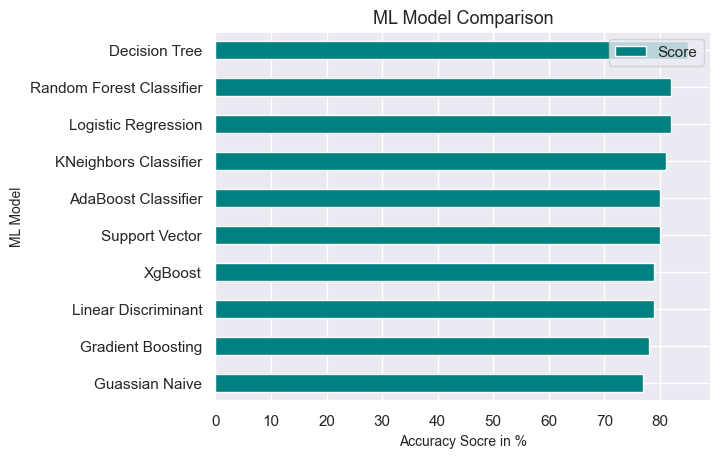

In [145]:

plt.figure(figsize = (10, 4))
Models.sort_values(by = 'Score').plot(kind='barh', color= 'teal')

plt.xlabel('Accuracy Socre in %', fontsize = 10)
plt.ylabel('ML Model', fontsize = 10)

plt.title('ML Model Comparison', fontsize = 13)

In [154]:
Decision_Tree_prediction = forest.predict(titanic_final_testset) 
prediction = pd.DataFrame(Decision_Tree_prediction)

prediction.to_csv('Submission.csv', index = False)
